# Final Project Report

#### STATS 102 Introduction to Data Science Session 1, 2022 Fall

---

# Project Title: Personality, interest, phobia, and lifestyle: knowing aspects of young people’s life


- Shiwei Wang (sw461@duke.edu)
- Yixuan Chen (yc480@duke.edu)
- Yuming Gong(yg187@duke.edu)

## 1 Introduction

Write the introduction of your project here to make the reader understand what you set out to do and what you achieved.



(1) General introduction

In this project, we will use a dataset named ‘young people survey’, which is a survey including Slovakian young adults from 15-30 years old in 2013. The survey recorded the interest, habits, opinions, fears, and demographic information such as educational background and gender of participants. 

(2) Problems and Models Description

Our project has three focuses. Our first purpose of this project is to investigate what features (interest, lifestyle etcetera) can predict the demographic features of participants and what is the best classification model for this. The second purpose is to study what features can predict the personality positive index of participants, which is an index that is calculated by us to indicate how positive a participant’s personality is. The higher the index is , the more generous, patient, confident, energetic, and optimistic a person is. We plan to calculate the positive index by adding the scores of questions related to positive personality traits and subtracting the scores of questions related to negative personality traits. Our last purpose is to investigate whether the participants can be categorized to several groups with similar in-group demographic features. 

(3) Expected Outcomes and Achievements

First, we aim to investigate what features can predict the demographic features of participants. We did z-tests to compare whether male and female, lower and higher education, being the only child or not, living in flats or houses, and living in village or town in childhood leads to statistically different scores for 140 questions that ask about different aspects of the life of young adults. We then noted down the variables that each demographic feature is statistically different in and used them as classification features. We then chose 1 optimized model out of 4 classification models to best predict a demographic feature. The 4 classification models are: Random Forest, KNeighborsClassifier,  SVC and  Logistic Regression.

Second, we used KMeans to classify participants into 4 groups. We found that their gender and educational levels are slightly different.

Third, we hope to use linear or nonlinear regression to form a feasible regression function, which can be used to predict young people’s positive personal traits according to their personal interests, health habits and some demographic information. We picked out problems on personality traits with obvious positive or negative tendencies, and got our “positive personal traits index” as a continuous dependent variable. We recoded other categorical variables and constituted our independent variable dataset together with the remaining numeric variables. We performed multiple linear regression fits, tried and compared different models and screened variables using stepwise selections, and ended up with a linear regression equation with the best fit. At the same time, we also tried nonlinear regression and tried to solve the overfitting problem.

## 2 Background 

Write the relevant background information (the related work or state of the art in the area) about your project.

(1) Background information

There is a difference between gender and interest, lifestyle, phobia, life opinions, and habits. Gender and personal interest are suggested to be highly associated. Shen et al. (2003) shows that girls demonstrated higher personal interest in dance than boys. Studies also found that female adolescents tend to have a lower interest in attitudes of using computers and pursuing a science, technology, engineering, and math (STEM) career than male adolescents (Robnett et al., 2012; Katherine, 2012; Chen, 1986). Phobia is also shown to be related to gender, with higher prevalence of phobias in females and the tendency for females to give higher fear ratings for all objects and situations (Fredrikson et al., 1996). Gender is also demonstrated to be related to drinking and smoking behavior (Holmila & Raitasalo, 2005; Mucha et al., 2006).Thus, whether we can use one participant’s interest, phobia, and lifestyle to predict his or her gender is an interesting question to focus on. Similarly, we believe that other demographic features, including educational level, childhood living place, living in flats or houses, and being the only child or not is related to one’s interest, phobia, and lifestyle. We plan to study whether using one’s interest, phobia, and lifestyle can also predict other demographic features. 


Hogan (1991) suggests that people can be characterized in terms of their enduring dispositional qualities, which is the concept of personality. Personality can provide psychologists important information to learn about employee development and organizational effectiveness (Hogan, 1991). Studies have also shown that personality is highly associated with interest, vocational choices, and hobbies. A study shows that investigative and artistic preferences were positively correlated with Openness in personality and conventional preferences were correlated with Conscientiousness in personality (Gottfredson et al., 1993). Thus, it is interesting to investigate whether hobbies,lifestyles, and interest can predict an individual’s personality, which will be achieved by designing a regression model that can predict an individual’s positive index by his or her interest, hobbies, phobia, and lifestyles.

(2) Innovation and Gaps

Our study is the first study to investigate the relationship between various aspects ( interest, lifestyle, phobia, life opinions, and habits) and personality. We will use 3 methods, including classification, regression model, and clustering, to demonstrate the inner relationships between different aspects of young people’s life.

## 3 Design and Implementation

### Data collection, preprocessing and cleaning 

Our dataset “Young People Survey” comes from Kaggle(https://www.kaggle.com/datasets/miroslavsabo/young-people-survey), the dataset includes responses of 150 questions from 1010 participants. Participants were asked to give their levels of approval of descriptive statements from “strongly disagree=1” to “strongly agree=5” The variables can be split into the following music preferences (19 items), movie preferences (12 items), hobbies & interests (32 items), phobias (10 items), health habits (3 items), personality traits, views on life, & opinions (57 items), spending habits (7 items) and demographics (10 items).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dt = pd.read_csv('responses.csv')
dt

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


Initial Processing Data Summary: 1010 rows * 150 columns\
1010 rows: 1010 participants\
150 columns: 19 music + 12 movie + 32 hobbies & interests +10 phobia +3 health + 57 personality traits, views on life, & opinions + 7 spending + 10 demographic

We dropped rows including missing data before recoding. Except for the 10 demographic variables demographic, there are 5 variables consisting of strings. We recoded them as integers by their frequency and degree for further data analysis and model building. The higher the number, the higher the frequency. For 'Smoking', we recoded 'never smoked', 'tried smoking','former smoker','current smoker' as ‘0’, ‘1’, ‘3’, ‘5’ respectively. For 'Alcohol', we recoded 'never', 'social drinker','drink a lot' as ‘0’, ‘3’, ‘5’ respectively. For 'Punctuality', we recoded 'i am often running late','i am always on time','i am often early' as ‘1’, ‘3’, ‘5’ respectively. For ‘Lying', we recoded 'never','only to avoid hurting someone','sometimes','everytime it suits me' as ‘0’, ‘1’, ‘3’, ‘5’ respectively. For 'Internet usage', we recoded 'most of the day','few hours a day', 'less than an hour a day','no time at all' as ‘5’, ‘3’, ‘1’, ‘0’ respectively. 



In [2]:
dt.dropna()

dt['Smoking'].replace(['never smoked', 'tried smoking','former smoker','current smoker'], [0,1,3,5],inplace=True)
dt['Alcohol'].replace(['never', 'social drinker','drink a lot'], [0,3,5],inplace=True)
dt['Punctuality'].replace(['i am often running late','i am always on time','i am often early'], [1,3,5],inplace=True)
dt['Lying'].replace(['never','only to avoid hurting someone','sometimes','everytime it suits me'], [0,1,3,5],inplace=True)
dt['Internet usage'].replace(['most of the day','few hours a day', 'less than an hour a day','no time at all'], [5,3,1,0],inplace=True)

For the ten demographic variables, we recoded most of them as ‘0’ and ‘1’ except for continuous variables like age, weight and height. Gender was divided into female and male, and we recoded ‘female’ as ‘0’ and ‘male’ as ‘1’. Participants were asked about whether they use left or right hand more often, and we recoded ‘left handed’ as ‘0’, ‘right handed’ as ‘1’.Education was categorized into lower education (currently a primary school pupil, primary school, secondary school) and higher education (college/Bachelor degree, masters degree, doctorate degree). We recoded lower education as ‘0’ and higher education as ‘1’. Participants were asked about whether they were living in village or town during childhood, and we recoded ‘village’ as ‘0’, ‘town’ as ‘1’.For whether they are the only child in the family, we recoded the answers ‘no’ to ‘0’ and the answers ‘yes’ to ‘1’. For whether they are living in a block of flats or house/bungalow, we recoded the answers 'a block of flats' to ‘0’ and 'house/bungalow' to ‘1

In [3]:
#recode demographic variables
#recoding gender: 0 is female, 1 is male
dt['Gender'].replace(['female', 'male'],[0,1], inplace=True)

#recoding Left - right handed: 0 is left, 1 is right
dt['Left - right handed'].replace(['left handed', 'right handed'],[0,1], inplace=True)

#recoding education: 
#0 lower education (Currently a Primary school pupil, Primary school, Secondary school) 1 higher education (College/Bachelor degree, masters degree(categorical), doctorate degree)
#dt1['Higher Lower Edu']=dt1['Education'].replace(['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'],[0, 0, 0, 1,1,1], inplace=True)
dt['Education'].replace(['currently a primary school pupil','primary school','secondary school','college/bachelor degree','masters degree','doctorate degree'],[0, 0, 0, 1,1,1], inplace=True)

#recoding Village - town
dt['Village - town'].replace(['village', 'city'],[0,1], inplace=True)

#recoding only child to 0, not only child as 1
dt['Only child'].replace(['no','yes'],[0, 1], inplace=True)

#recoding living in flats to 0, house to 1
dt['House - block of flats'].replace(['block of flats','house/bungalow'],[0, 1], inplace=True)

As mentioned before, we are interested in the variables that are related to people’s personality traits (negative/positive). First, we selected 19 variables that have strong positive tendencies and  selected 8 variables that have strong negative tendencies and added them separately. Then we got a new variable ‘positive' indicating people’s positive personality traits scores and a new variable ‘negative' indicating people’s negative personality traits scores. The score of ‘positive’ minus ‘negative’ is our newly-generated variable ’personality_traits', which ranges from 4-36 and the higher score indicates a more positive mindset. 

In [4]:
#personal traits - positive 
columns_p = ['Healthy eating','Prioritising workload','Writing notes','Workaholism','Thinking ahead',
            'Reliability','Keeping promises','Giving','Compassion to animals','Borrowed stuff',
            'Charity','Punctuality','Waiting','Socializing','Assertiveness','Happiness in life',
            'Energy levels','Personality','Finding lost valuables']
dt['positive'] = dt[columns_p].sum(axis=1)

#personal traits - negative
columns_n = ['Loss of interest','Criminal damage','Hypochondria','Cheating in school','Lying',
             'Getting angry','Unpopularity','Life struggles']
dt['negative'] = dt[columns_n].sum(axis=1)

## dependent variable - positive index
dt['personality_traits'] = dt['positive'] - dt['negative']
dt = dt.dropna()
dt

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,positive,negative,personality_traits
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,66.0,12.0,54.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,0.0,1.0,1.0,0.0,1.0,0.0,64.0,22.0,42.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,2.0,0.0,1.0,0.0,0.0,1.0,0.0,66.0,21.0,45.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,23.0,40.0
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,64.0,23.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,55.0,24.0,31.0
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,54.0,27.0,27.0
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,43.0,25.0,18.0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,58.0,27.0,31.0


Post Processing Data Summary: 674 rows * 153 columns\
674 Rows: observations left after dropna\
153 Columns: 150 original questions + ‘positive’ + ‘negative’ + ’personality_traits'

In [5]:
import statsmodels.stats.weightstats as sw
import seaborn as sns
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import statsmodels.stats.weightstats as sw

### Z-test

We first recoded 5 demographic features to binary variables as we mentioned in the data preprocessing and cleaning part. We then compared whether being male or female, having lower or higher education, being the only child or not, living in flats or houses, and living in a village or city in childhood leads to statistically different scores for 140 variables that ask about different aspects of the life of young adults. We conducted 140 Z-tests for each of the 5 demographic features. Five loops were written to output all variables that each pair of demographic features is statistically different in. In total, the z-tests output 5 groups of variables that will be used as classification features to predict each of the demographic features in later parts. 

In [6]:
#what variables, out of  140 variables, are female /male statistically different in?
#recoding male to 0, female as 1
list0 = []

dt_m = dt[dt['Gender'] == 1].dropna()
dt_f = dt[dt['Gender'] == 0].dropna()

for i in list(dt)[0:140]:
    array1 = pd.to_numeric(dt_m[i])
    array2 = pd.to_numeric(dt_f[i])
    tup = sw.ztest(array1, array2, value=0) 
    
    if tup[1] < 0.05:    # p value < 0.05，then refuse the hypothesis, and the mean for two samples are different
        list0.append(i)
        
    else:
        continue

list0

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Country',
 'Musical',
 'Pop',
 'Metal or Hardrock',
 'Hiphop, Rap',
 'Latino',
 'Techno, Trance',
 'Horror',
 'Thriller',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Biology',
 'Reading',
 'Foreign languages',
 'Medicine',
 'Cars',
 'Art exhibitions',
 'Countryside, outdoors',
 'Dancing',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Spiders',
 'Snakes',
 'Rats',
 'Ageing',
 'Dangerous dogs',
 'Fear of public speaking',
 'Healthy eating',
 'Daily events',
 'Prioritising workload',
 'Writing notes',
 'Workaholism',
 'Friends versus money',
 'Funniness',
 'Criminal damage',
 'Decision making',
 'Hypochondria',
 'Empathy',
 'Eating to survi

Our null hypothesis is that each of the feature data being tested has an approximate distribution and the same mean value in the male and female populations. In our test loop, if the p-value of a ztest is smaller than 0.05, then we reject the null hypothesis and think that this tested feature has different distributions and different mean value in the male and female populations. Then we will add this feature to our list, and this feature will be considered as a qualified feature we have selected that can be used to distinguish gender.

In [7]:
#what variables, out of  140 variables, are participants who are only-child /not only-child statistically different in?
#recoding only child to 0, not only child as 1

dt_only = dt[dt['Only child'] == 0]
dt_not_only = dt[dt['Only child'] == 1]

list1 = []


for i in list(dt)[0:140]:
    array1 = pd.to_numeric(dt_only[i])
    array2 = pd.to_numeric(dt_not_only[i])
    tup = sw.ztest(array1, array2, value=0) 
    
    if tup[1] < 0.05:  # p value < 0.05，then refuse the hypothesis, and the mean for two samples are different
        list1.append(i)
        
    else:
        continue

list1

['Folk',
 'Law',
 'Fun with friends',
 'Elections',
 'Empathy',
 'Responding to a serious letter',
 'Children',
 'Shopping centres',
 'Spending on looks',
 'Spending on healthy eating']

Our null hypothesis is that each of the feature data being tested has an approximate distribution and the same mean value in the ‘only child’ and ‘not only child’ populations. In our test loop, if the p-value of a ztest is smaller than 0.05, then we reject the null hypothesis and think that this tested feature has different distributions and different mean value in the ‘only child’ and ‘not only child’ populations. Then we will add this feature to our list, and this feature will be considered as a qualified feature we have selected that can be used to distinguish whether this person is an only-child or not.

In [8]:
#what variables, out of  140 variables, are participants who are lower /higher edu level statistically different in?
#lower edu: elemntary, secondary school; higher edu: banchelor's, master's, doctoral degree

dt_lower_education = dt[(dt['Education'] == 0)]
dt_higher_education = dt[(dt['Education'] == 1)]

list2 = []


for i in list(dt)[0:140]:
    array1 = pd.to_numeric(dt_lower_education[i])
    array2 = pd.to_numeric(dt_higher_education[i])
    tup = sw.ztest(array1, array2, value=0) 
    
    if tup[1] < 0.05:    # p value < 0.05，then refuse the hypothesis, and the mean for two samples are different
        list2.append(i)
        
    else:
        continue

list2

['Folk',
 'Country',
 'Classical music',
 'Swing, Jazz',
 'Alternative',
 'Documentary',
 'Alcohol',
 'Daily events',
 'Writing notes',
 'Workaholism',
 'Criminal damage',
 'Cheating in school',
 'Charity',
 'Number of friends',
 'Achievements',
 'Getting up',
 'Shopping centres']

Our null hypothesis is that each of the feature data being tested has an approximate distribution and the same mean value in the ‘lower’ and ‘higher’ education level populations. In our test loop, if the p-value of a ztest is smaller than 0.05, then we reject the null hypothesis and think that this tested feature has different distributions and different mean value in the ‘lower’ and ‘higher’ education level populations. Then we will add this feature to our list, and this feature will be considered as a qualified feature we have selected that can be used to distinguish whether this person has a ‘lower’ or ‘higher’ education level.

In [9]:
#what variables, out of  140 variables, are participants who spend childhood in village/twon statistically different in?
#village 0, town 1
dt_village = dt[(dt['Village - town'] == 0)]
dt_town = dt[(dt['Village - town'] == 1)]

list3 = []


for i in list(dt)[0:140]:
    array1 = pd.to_numeric(dt_village[i])
    array2 = pd.to_numeric(dt_town[i])
    tup = sw.ztest(array1, array2, value=0) 
    
    if tup[1] < 0.05:   # p value < 0.05，then refuse the hypothesis, and the mean for two samples are different
        list3.append(i)
        
    else:
        continue

list3

['Folk',
 'Politics',
 'Biology',
 'Religion',
 'Countryside, outdoors',
 'Gardening',
 'Storm',
 'Dangerous dogs',
 'Final judgement',
 'Friends versus money',
 'Empathy',
 'God',
 'Punctuality',
 'Assertiveness',
 'Spending on looks']

Our null hypothesis is that each of the feature data being tested has an approximate distribution and the same mean value in the ‘village’ and ‘town’ populations. In our test loop, if the p-value of a ztest is smaller than 0.05, then we reject the null hypothesis and think that this tested feature has different distributions and different mean value in the ‘village’ and ‘town’ populations. Then we will add this feature to our list, and this feature will be considered as a qualified feature we have selected that can be used to distinguish whether this person lives in the ‘village’ or ‘town’.

In [10]:
#what variables, out of  140 variables, are participants who live in flats/houses statistically different in?
#recoded flats 0, town 1
dt_house = dt[(dt['House - block of flats'] == 1)]
dt_flat = dt[(dt['House - block of flats'] == 0)]

list4 = []


for i in list(dt)[0:140]:
    array1 = pd.to_numeric(dt_flat[i])
    array2 = pd.to_numeric(dt_house[i])
    tup = sw.ztest(array1, array2, value=0) 
    
    if tup[1] < 0.05:     # p value < 0.05，then refuse the hypothesis, and the mean for two samples are different
        list4.append(i)
        
    else:
        continue

list4

['Dance',
 'Folk',
 'Horror',
 'Internet',
 'Economy Management',
 'Biology',
 'Religion',
 'Countryside, outdoors',
 'Gardening',
 'Pets',
 'Storm',
 'Rats',
 'Dangerous dogs',
 'Final judgement',
 'God',
 'Dreams',
 'Assertiveness',
 'Internet usage',
 'Shopping centres']

Our null hypothesis is that each of the feature data being tested has an approximate distribution and the same mean value in the ‘house’ and ‘block of flats’ populations. In our test loop, if the p-value of a ztest is smaller than 0.05, then we reject the null hypothesis and think that this tested feature has different distributions and different mean value in the ‘house’ and ‘block of flats’ populations. Then we will add this feature to our list, and this feature will be considered as a qualified feature we have selected that can be used to distinguish whether this person lives in the ‘house’ or ‘block of flats’.

### Classification

In this section, we will use variables selected in previous z-test to predict 5 demographic features in 5 models.\
To find a better model, we use Random Forest Classifier, KNeighborsClassifier, SVM classifier and Logistic regression to train our data and select one model with the highest accuracy score. 

First, we define 4 fuctions for 4 classfication method.

In [11]:
# define a function of random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def RF(X_train, Y_train):
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    print("accuracy score=" + str(accuracy_score(Y_pred,Y_test)) )

In [12]:
# define a function of KNN classifier
from sklearn.neighbors import KNeighborsClassifier
def KNN(X_train, Y_train):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("accuracy score=" + str(accuracy_score(Y_pred,Y_test)) )

In [13]:
# define a function of SVM classifier
from sklearn.svm import SVC
def SVM(X_train, Y_train):
    svc = SVC(probability=True)
    svc.fit(X_train,Y_train)
    Y_pred = svc.predict(X_test)
    print("accuracy score=" + str(accuracy_score(Y_pred,Y_test)) )

In [14]:
# define a function of Logistic regression classifier
from sklearn.linear_model import LogisticRegression
def Logistic(X_train, Y_train):
    model = LogisticRegression(random_state=0,max_iter=1000)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    print("accuracy score=" + str(accuracy_score(Y_pred,Y_test)) )
    #print(classification_report(Y_test, Y_pred))

### Model building 1: Logistic Regression model to predict gender

In [15]:
Y=dt['Gender']
X=dt[list0]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,random_state=42)

RF(X_train, Y_train)
KNN(X_train, Y_train)
SVM(X_train, Y_train)
Logistic(X_train, Y_train)

accuracy score=0.8592592592592593
accuracy score=0.8592592592592593
accuracy score=0.8962962962962963
accuracy score=0.9037037037037037


LogisticRegression method is the best model here to predict gender.

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92        76
         1.0       0.91      0.86      0.89        59

    accuracy                           0.90       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.90      0.90      0.90       135



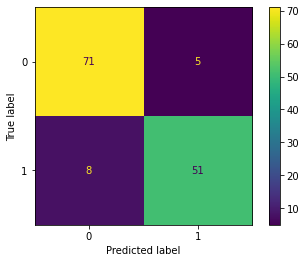

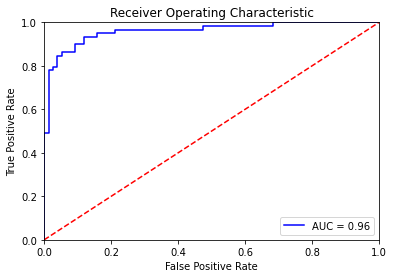

In [16]:
model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score for this model is 0.90, by using this model, we can predict the gender of our participants 90% accurately. The confusion matrix tells us the true predictions, whether positive or negative, are good. I also draw a ROC curve and we can see the area under the roc curve (AUC) is 0.96, which means there is a 96% chance that the model will be able to distinguish between positive class and negative class.

In [17]:
importances = pd.DataFrame(data={
    'Trait': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(
    by='Importance', 
    ascending=False).set_index(keys='Trait')
importances[:10]

,Importance
Trait,
PC,1.222937
War,1.038238
Funniness,0.877054
Health,0.751887
Country,0.686405
Science and technology,0.648297
Sci-fi,0.640868
Branded clothing,0.616865
Appearence and gestures,0.598960


The ten most important features for prediction of gender are PC, War, Funniness, Health, Country, Science and technology, Sci-fi, Branded clothing, Appearence and gestures and Shopping centres.

### Model building 2: Logistic Regression model to predict whether is the only child in the family 

In [18]:
Y=dt['Only child']
X=dt[list1]
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,random_state=42)

RF(X_train, Y_train)
KNN(X_train, Y_train)
SVM(X_train, Y_train)
Logistic(X_train, Y_train)

accuracy score=0.7555555555555555
accuracy score=0.762962962962963
accuracy score=0.7925925925925926
accuracy score=0.8


LogisticRegression is the best modelhere to predict whether one person is the only child in their family.

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       107
         1.0       1.00      0.04      0.07        28

    accuracy                           0.80       135
   macro avg       0.90      0.52      0.48       135
weighted avg       0.84      0.80      0.72       135



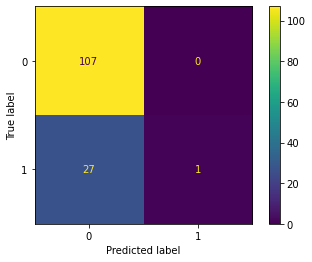

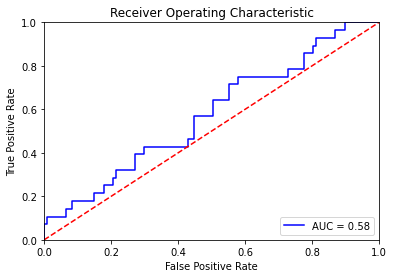

In [19]:
model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score for this model is 0.80, by using this model, we can predict whether one person is the only child 80% accurately. The result of the confusion matrix shows that the dataset here is unbalanced, 
The AUC is only 0.58 and indicates a relatively low accuracy. The performance of this model is not good. 

### Model building 3: SVM classifier model to predict education level

In [20]:
Y=dt['Education']
X=dt[list2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

RF(X_train, Y_train)
KNN(X_train, Y_train)
SVM(X_train, Y_train)
Logistic(X_train, Y_train)

accuracy score=0.725925925925926
accuracy score=0.6592592592592592
accuracy score=0.7333333333333333
accuracy score=0.7185185185185186


SVM method is the best model here to predict the education level.

              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        99
         1.0       0.00      0.00      0.00        36

    accuracy                           0.73       135
   macro avg       0.37      0.50      0.42       135
weighted avg       0.54      0.73      0.62       135



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


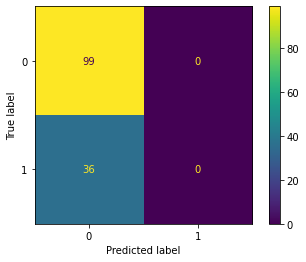

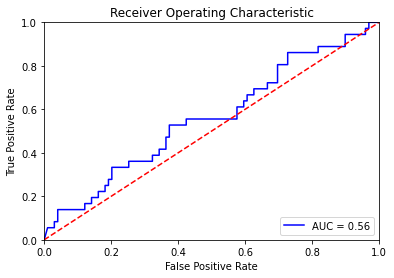

In [21]:
svc = SVC(probability=True)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print(classification_report(Y_test, Y_pred))

predictions = svc.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

probs = svc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score for this model is 0.73, by using this model, we can predict a person’s education level 73% accurately. The confusion matrix shows that the false positive predictors and the true negative predictors are 0. Here there is also a strongly unbalanced problem. The AUC is only 0.56 and indicates a relatively low accuracy. The performance of this model is not good.



### Model building 4: SVM classifier model to predict whether living in village/town

In [22]:
Y=dt['Village - town']
X=dt[list3]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

RF(X_train, Y_train)
KNN(X_train, Y_train)
SVM(X_train, Y_train)
Logistic(X_train, Y_train)

accuracy score=0.7333333333333333
accuracy score=0.6888888888888889
accuracy score=0.7481481481481481
accuracy score=0.7333333333333333


SVM method is the best model to predict whether one person is living in village/town.

              precision    recall  f1-score   support

         0.0       0.71      0.14      0.23        37
         1.0       0.75      0.98      0.85        98

    accuracy                           0.75       135
   macro avg       0.73      0.56      0.54       135
weighted avg       0.74      0.75      0.68       135



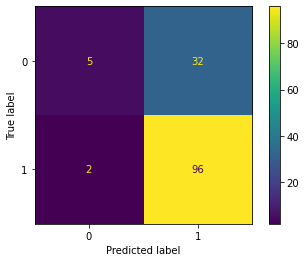

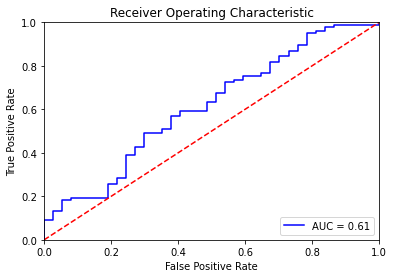

In [23]:
svc = SVC(probability=True)
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
print(classification_report(Y_test, Y_pred))

predictions = svc.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

probs = svc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The accuracy score for this model is 0.75, by using this model, we can predict whether a person is living in village/town 75% accurately. Although the accuracy score is not low, the AUC is only 0.61 and indicates a relatively low accuracy

### Model building 5: Logistic Regression model to predict whether living in house/blocks of flats

In [24]:
Y=dt['House - block of flats']
X=dt[list4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

RF(X_train, Y_train)
KNN(X_train, Y_train)
SVM(X_train, Y_train)
Logistic(X_train, Y_train)

accuracy score=0.6370370370370371
accuracy score=0.562962962962963
accuracy score=0.6444444444444445
accuracy score=0.6888888888888889


LogisticRegression is the best model to predict whether a person is living in house/flat

              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78        83
         1.0       0.68      0.37      0.47        52

    accuracy                           0.69       135
   macro avg       0.69      0.63      0.63       135
weighted avg       0.69      0.69      0.66       135



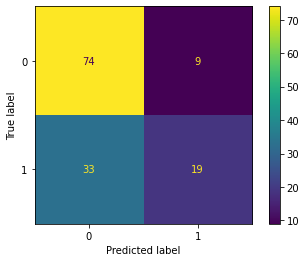

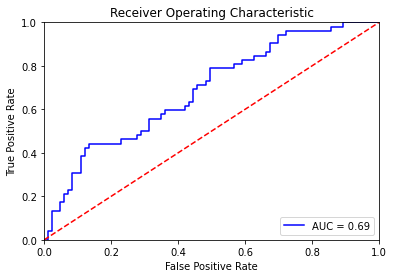

In [25]:
model = LogisticRegression(random_state=0,max_iter=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(classification_report(Y_test, Y_pred))

predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()
plt.show()

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The accuracy score for this model is 0.69, by using this model, we can predict whether one person is living in house/blocks of flats 69% accurately. The AUC is 0.69 and 69% chance that the model will be able to distinguish between positive class and negative class.


+ In sum, Model 1 shows the best performance by using Logistic Regression method. When we know about peopls's preferences, interests, habits, opinions and fears, we can predict their gender almost correctly. PC, War, Funniness, Health, Country, Science and technology, Sci-fi are the most important features that help predcit the gender of the participants.

### Regression

We hope to use linear or nonlinear regression to form a feasible regression function, then we can use it to predict young people’s positive personal traits according to their personal interests, health habits and some demographic information.

### variables

dependent variable: 
"personality_traits" data

independent variables: 
We recode other categorical variables and constitute our independent variable dataset together with the remaining numeric variables except for those questions used to form our "personal traits index". There are 123 independent variables in total for us to test.

In [26]:
## independent variables
ind = dt.drop(columns=['Healthy eating','Prioritising workload','Writing notes','Workaholism','Thinking ahead',
            'Reliability','Keeping promises','Giving','Compassion to animals','Borrowed stuff',
            'Charity','Punctuality','Waiting','Socializing','Assertiveness','Happiness in life',
            'Energy levels','Personality','Finding lost valuables',
            'Loss of interest','Criminal damage','Hypochondria','Cheating in school','Lying',
            'Getting angry','Unpopularity','Life struggles','positive','negative','personality_traits'])
ind

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,...,20.0,186.0,77.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,5.0,3.0,4.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,...,22.0,175.0,60.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### Linear regression

Firstly, we assume that our dependent variable has a linear relationship with our independent variables, and we choose to do some linear regression to test our hypothesis.

### Model building 1: Multiple Linear Regression Model (MLR)

The first linear model we choose is Multiple linear regression (MLR) Model. It is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The reason why we choose this model is that in essence it is the extension of ordinary least-squares (OLS) regression model and is relatively easy to understand.Since we have 123 independent variables to study, which is too many, we decided to try the first run of the MLR model directly.

In [33]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


# Fit linear model for data
X = ind
y = dt['personality_traits']

# sklearn
mod = LinearRegression().fit(X, y)
print(mod.coef_)
print(mod.intercept_)
print(mod.score(X, y))

# statsmodels
X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()

[ 4.64379498e-01 -3.86802918e-01  2.94103058e-01 -4.71390534e-01
  1.03938706e-01  1.36844614e-01  4.08773161e-01 -3.14363093e-01
 -7.82362190e-02  1.93471831e-01  1.58552455e-01  8.29971751e-01
 -4.45100296e-01  1.35062775e-01  5.29770077e-01 -7.46187581e-01
 -1.52966019e-01 -5.83087209e-01  1.55664068e-01 -5.05399664e-01
  3.99276236e-01 -3.41689064e-01 -7.31085204e-01  5.44913416e-01
  3.77464231e-02 -8.34551310e-01  1.72604446e-01  1.45352237e-01
  7.83251873e-02 -2.20006872e-01 -3.21858860e-02  4.39662943e-02
  9.25188647e-02 -1.03004571e-01  7.03890517e-01  2.54940363e-01
 -3.59797465e-01  1.03894215e-01  5.92912724e-01 -5.84339692e-02
  4.21387919e-01  9.54290525e-02  5.48070132e-01  5.75762254e-02
 -8.37413463e-03  2.83815174e-01  2.55074694e-01  4.54603227e-01
 -3.99235592e-01  7.68246425e-01 -2.96948191e-01  1.64833977e-02
 -5.48164560e-02 -1.97113289e-01 -5.44469802e-02 -3.11001234e-01
 -6.80261375e-01  5.68262290e-01  3.82207765e-01 -1.10104072e-01
 -6.57099047e-01  1.15602

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     personality_traits   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     5.551
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           4.77e-45
Time:                        23:55:23   Log-Likelihood:                -2209.8
No. Observations:                 674   AIC:                             4668.
Df Residuals:                     550   BIC:                             5227.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             11.6761     10.587      1.103      0.271      -9.119      32.471
Music                              0.4644      0.547      0.848      0.397      -0.611       1.540
Slow songs or fast songs          -0.3868      0.400     -0.966      0.334      -1.173       0.400
Dance                              0.2941      0.345      0.852      0.394      -0.384       0.972
Folk                              -0.4714      0.333     -1.417      0.157      -1.125       0.182
Country                            0.1039      0.338      0.307      0.759      -0.560       0.768
Classical music                    0.1368      0.359      0.381      0.703      -0.568       0.842
Musical                            0.4088      0.314      1.303      0.193      -0.208       1.025
Pop                               -0.3144      0.329     -0.956      0.339      -0.960       0.331
Rock                              -0.0782      0.373     -0.209      0.834      -0.812       0.655
Metal or Hardrock                  0.1935      0.304      0.636      0.525      -0.404       0.791
Punk                               0.1586      0.317      0.501      0.617      -0.463       0.780
Hiphop, Rap                        0.8300      0.288      2.880      0.004       0.264       1.396
Reggae, Ska                       -0.4451      0.304     -1.464      0.144      -1.042       0.152
Swing, Jazz                        0.1351      0.321      0.421      0.674      -0.495       0.765
Rock n roll                        0.5298      0.340      1.558      0.120      -0.138       1.198
Alternative                       -0.7462      0.290     -2.571      0.010      -1.316      -0.176
Latino                            -0.1530      0.299     -0.511      0.610      -0.741       0.435
Techno, Trance                    -0.5831      0.266     -2.190      0.029      -1.106      -0.060
Opera                              0.1557      0.357      0.436      0.663      -0.545       0.857
Movies                            -0.5054      0.544     -0.929      0.353      -1.574       0.563
Horror                             0.3993      0.273      1.464      0.144      -0.136       0.935
Thriller                          -0.3417      0.332     -1.029      0.304      -0.994       0.311
Comedy                            -0.7311      0.483     -1.513      0.131      -1.680       0.218
Romantic                           0.5449      0.333      1.638      0.102      -0.109       1.199
Sci-fi                             0.0377      0.291      0.130      0.897      -0.533       0.609
War                               -0.8346      0.278     -3.000      0.003      -1.381      -0.288
Fantasy/Fairy tales                0.1726      0.402      0.430      0.667      -0.616       0.961
Animated      

We use both sklearn and statsmodels to conduct the MLR, and we get basically the same conclusion. The R-squared is 0.554, and the adjusted R-squared is 0.454. This means our independent variables only have nearly half the explanatory power of our dependent variable. According to the column "P>|t|", many of our independent variables have correlations that are not statistically significant to our dependent variable (because p>0.05), so we need to further optimize our model.

Considering we have too many independent variables without statistical significance to our dependent variable, we choose stepwise selection model to reduce our independent variables as well as picking out those most significant variables. The reason why we choose this model is that stepwise regression is a good method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. In each step, a variable is considered for addition to or subtraction from the set of explanatory variables based on some prespecified criterion.

In [ ]:
## Backward Stepwise Selection

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# The variables for saving
# the optimal models for different numbers of features
opt_mods = []
opt_features = []

# ------STEP1--------
# 3.1. Full model
# ----------------- #
X = ind
y = dt['personality_traits']
initial_features = list(set(X.columns))
mod = LinearRegression().fit(X, y)
opt_mods.append(mod)
opt_features.append(initial_features)

# ------STEP2--------
for k in range(1,X.shape[1]-1):
    mk_rss = np.inf
    mk_mod = None
    mk_features = None
    mk_1_features = opt_features[-1]
    #print(mk_1_features)
    candidate_features = mk_1_features
    for i in candidate_features:

        mk_1_features_pi = candidate_features.copy()
        mk_1_features_pi.remove(i)
     
        mod = LinearRegression().fit(X[mk_1_features_pi], y)
        
        
        y_pred = mod.predict(X[mk_1_features_pi])
        rss = sum((y - y_pred)**2)
        
        # Document the one with smallest rss
        if rss < mk_rss:
            mk_rss = rss
            mk_mod = mod
            mk_features = mk_1_features_pi
        
    # 3.2.1.2. Save optimal model with k features
    opt_mods.append(mk_mod)
    opt_features.append(mk_features)

# ------STEP3--------   
mod = LinearRegression().fit(np.ones([X.shape[0],1]), y)
opt_mods.append(mod)
opt_features.append([])


single_opt_mod_score = -np.inf
opt_mod_idx = 0

for i in range(0,len(opt_mods)-1):
    # 3.3.1. Cross-validation
    scores = cross_validate(opt_mods[i], X[opt_features[i]], y, scoring='r2', cv=5)
    
    scores_mean = scores['test_score'].mean()
    print(scores_mean)

    # 3.3.2. Document the sinle optimal model
    if scores_mean > single_opt_mod_score:
        single_opt_mod_score = scores_mean
        opt_mod_idx = i
# Output the features
print(opt_features[opt_mod_idx])


In [29]:
## Forward Stepwise Selection

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# The variables for saving
# the optimal models for different numbers of features
opt_mods = []
opt_features = []

# ----------------- #
#
# ------STEP1--------
#
# 3.1. Null model
# ----------------- #
X = ind
y = dt['personality_traits']
mod = LinearRegression().fit(np.ones([X.shape[0],1]), y)
opt_mods.append(mod)
opt_features.append([])
# ----------------- #
#
# ------STEP2--------
#
# 3.2. Search for the optimal 
# models for different numbers of features
# ----------------- #
# 3.2.1. We search for optimal model with k features
# through adding a feature to the optimal model with k-1 features

for k in range(1, X.shape[1]):
    mk_rss = np.inf
    mk_mod = None
    mk_features = None
    
    # 3.2.1.1. scan all the features 
    # not in the optimal model with k-1 features.
    # NOTE: we append feature to the list, so the last element
    # in opt_features will be fore model k-1.
    mk_1_features = opt_features[-1]
    candidate_features = set(X.columns) - set(mk_1_features)
    
    for i in candidate_features:
        # Add feature i
        mk_1_features_pi = mk_1_features + [i]
        
        # Train the model
        mod = LinearRegression().fit(X[mk_1_features_pi], y)
        
        # Calculate RSS for training data
        y_pred = mod.predict(X[mk_1_features_pi])
        rss = sum((y - y_pred)**2)
        
        # Document the one with smallest rss
        if rss < mk_rss:
            mk_rss = rss
            mk_mod = mod
            mk_features = mk_1_features_pi
        
    # 3.2.1.2. Save optimal model with k features
    opt_mods.append(mk_mod)
    opt_features.append(mk_features)

# ----------------- #
#
# ------STEP3--------
#
# 3.3. Get the single optimal algorithm
# ----------------- #
single_opt_mod_score = -np.inf
opt_mod_idx = 0
for i in range(1, len(opt_mods)):
    # 3.3.1. Cross-validation
    scores = cross_validate(opt_mods[i], X[opt_features[i]], y, scoring='r2', cv=5)
    scores_mean = scores['test_score'].mean()
    print(scores_mean)
    
    # 3.3.2. Document the sinle optimal model
    if scores_mean > single_opt_mod_score:
        single_opt_mod_score = scores_mean
        opt_mod_idx = i

# Output the features
print(opt_features[opt_mod_idx])


0.0825594293919272
0.15458105711297268
0.19871289059972227
0.23180157855224995
0.2597101818732565
0.2771652728687776
0.2942055321760818
0.30963403818778545
0.32615683856761846
0.33989303402726395
0.3514573139446699
0.36003790389349655
0.3704089832282461
0.37402342490891727
0.382199869273686
0.3839029244371441
0.39151476857996814
0.3959413663839523
0.4013481493106359
0.40584816765915865
0.4092952928921075
0.41321064462360235
0.4148592204467089
0.4168144880297553
0.41862889796477243
0.4171423359632566
0.41958772393614563
0.42139569501127283
0.42333041923728254
0.4269877861328718
0.42973173550548116
0.4317952272790686
0.4327899569033537
0.4325059801823429
0.4354186708301195
0.4392053907683038
0.4369044341600932
0.4376114484489375
0.43792507648153334
0.43969038070772093
0.43764254101979694
0.43616923728228246
0.4338735402497755
0.43370582889451026
0.4341121358261676
0.4357710664673774
0.4354806237419978
0.4281334184826804
0.4253634062618623
0.42597172149086865
0.4211316521816024
0.41989323

By carrying out both the backward and forward stepwise selection models, we successfully pick out 46 significant independent variables for our second run of MLR. Then we draw a heatmap of the 46 independent variables related to personal traits according to their ranking indicators.

In [ ]:
# Draw a heatmap of ranking indicators related to personal_traits
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import re

cols = ['Getting up', 'Interests or hobbies', 'Finances', 'Fake', 'Elections', 'Countryside, outdoors', 'Mood swings', 'Romantic', 'Physics', 'Daily events', 'Final judgement', 'Changing the past', "Parents' advice", 'Darkness', 'Art exhibitions', 'Alcohol', 'Number of friends', 'War', 'Economy Management', 'Pets', 'Empathy', 'Alternative', 'Spending on healthy eating', 'Decision making', 'Internet', 'Responding to a serious letter', 'Techno, Trance', 'Appearence and gestures', 'Science and technology', 'Mathematics', 'Celebrities', 'Hiphop, Rap', 'Fear of public speaking', 'Internet usage', 'Rock n roll', 'Geography', 'Flying', 'Ageing', 'Shopping', 'Fun with friends', 'Dreams', 'Age', 'Chemistry', 'Dancing', 'Passive sport', 'Law']
data1 = ind[cols]
df = pd.concat([dt['personality_traits'], data1], axis=1).dropna()

def Heatmap(data):
    data.corr()[['personality_traits']].sort_values(by='personality_traits', ascending=False)
    plt.figure(figsize=(5, 25))
    heatmap = sns.heatmap(data.corr()[['personality_traits']].sort_values(by='personality_traits', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
    heatmap.set_title('Features Correlating with personality_traits', fontdict={'fontsize':10}, pad=16);
Heatmap(df)

However, we can see from the heatmap that all the linear relationships between these predicting variables and dependent variable are very general. Some of them have relatively strong positive correlations, e.g. interests/hobbies, finances; some have relatively strong negative correlations, e.g. getting up, fake, changing the past. But actually all the correlations are not so reasonably linear. Therefore, we feel like our linear model deserves further investigation.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm


# Fit linear model for data
X = ind[['Getting up', 'Interests or hobbies', 'Finances', 'Fake', 'Elections', 'Countryside, outdoors', 'Mood swings', 'Romantic', 'Physics', 'Daily events', 'Final judgement', 'Changing the past', "Parents' advice", 'Darkness', 'Art exhibitions', 'Alcohol', 'Number of friends', 'War', 'Economy Management', 'Pets', 'Empathy', 'Alternative', 'Spending on healthy eating', 'Decision making', 'Internet', 'Responding to a serious letter', 'Techno, Trance', 'Appearence and gestures', 'Science and technology', 'Mathematics', 'Celebrities', 'Hiphop, Rap', 'Fear of public speaking', 'Internet usage', 'Rock n roll', 'Geography', 'Flying', 'Ageing', 'Shopping', 'Fun with friends', 'Dreams', 'Age', 'Chemistry', 'Dancing', 'Passive sport', 'Law']]
y = dt['personality_traits']

# sklearn
mod = LinearRegression().fit(X, y)
print(mod.coef_)
print(mod.intercept_)
print(mod.score(X, y))

X = sm.add_constant(X)
results = sm.OLS(y,X).fit()
results.summary()


We try the second run of the MLR model to do some comparison with the first run. We also use both sklearn and statsmodels to conduct the MLR, and we also get basically the same conclusion. The R-squared now is 0.525, and the adjusted R-squared is 0.490. This means our current 46 independent variables still have nearly half the explanatory power of our dependent variable. But compared to the first run, the difference between the R-squared and the adjusted R-squared is much smaller, indicating that the model fits better this time. According to the column "P>|t|", there are still several of our independent variables have correlations that are not statistically significant to our dependent variable (p>0.05), so we drop them and test a third run with remaining 32 features.

In [32]:
## drop independent variables whose p-values are >0.05


def looper(limit, data):  
    cols = ['Getting up', 'Interests or hobbies', 'Finances', 'Fake', 'Elections', 'Countryside, outdoors', 'Mood swings', 'Romantic', 'Physics', 'Daily events', 'Final judgement', 'Changing the past', "Parents' advice", 'Darkness', 'Art exhibitions', 'Alcohol', 'Number of friends', 'War', 'Economy Management', 'Pets', 'Empathy', 'Alternative', 'Spending on healthy eating', 'Decision making', 'Internet', 'Responding to a serious letter', 'Techno, Trance', 'Appearence and gestures', 'Science and technology', 'Mathematics', 'Celebrities', 'Hiphop, Rap', 'Fear of public speaking', 'Internet usage', 'Rock n roll', 'Geography', 'Flying', 'Ageing', 'Shopping', 'Fun with friends', 'Dreams', 'Age', 'Chemistry', 'Dancing', 'Passive sport', 'Law']
    
    for i in range(len(cols)):  
        data1 = data[cols]
        
        X = sm.add_constant(data1)
        Y = dt['personality_traits']
        model = sm.OLS(Y, X)  

        result = model.fit() 
        pvalues = result.pvalues 
        pvalues.drop('const',inplace=True) 
        pmax = max(pvalues) 
        if pmax>limit:  
            ind = pvalues.idxmax() 
            cols.remove(ind) 
        else:  
            return result
result = looper(0.05,ind)  
result.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     personality_traits   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     20.10
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.66e-76
Time:                        23:55:23   Log-Likelihood:                -2247.6
No. Observations:                 674   AIC:                             4561.
Df Residuals:                     641   BIC:                             4710.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             21.8804      3.997      5.474      0.000      14.032      29.729
Getting up                        -1.2390      0.223     -5.553      0.000      -1.677      -0.801
Interests or hobbies               0.8759      0.262      3.340      0.001       0.361       1.391
Finances                           0.9495      0.257      3.689      0.000       0.444       1.455
Fake                              -0.8175      0.289     -2.831      0.005      -1.384      -0.251
Elections                          0.5463      0.181      3.017      0.003       0.191       0.902
Countryside, outdoors              0.7610      0.239      3.184      0.002       0.292       1.230
Mood swings                       -0.9893      0.282     -3.510      0.000      -1.543      -0.436
Romantic                           0.5600      0.258      2.167      0.031       0.052       1.068
Final judgement                    0.8179      0.208      3.938      0.000       0.410       1.226
Changing the past                 -0.6394      0.238     -2.688      0.007      -1.106      -0.172
Parents' advice                    0.8686      0.348      2.493      0.013       0.184       1.553
Darkness                          -0.9498      0.241     -3.939      0.000      -1.423      -0.476
Art exhibitions                    0.7168      0.239      2.998      0.003       0.247       1.186
Alcohol                           -0.6143      0.213     -2.887      0.004      -1.032      -0.197
Number of friends                  0.7512      0.297      2.532      0.012       0.169       1.334
War                               -0.7590      0.216     -3.509      0.000      -1.184      -0.334
Economy Management                 0.5939      0.213      2.784      0.006       0.175       1.013
Pets                               0.5070      0.181      2.794      0.005       0.151       0.863
Empathy                            0.6965      0.257      2.705      0.007       0.191       1.202
Alternative                       -0.4903      0.226     -2.167      0.031      -0.935      -0.046
Spending on healthy eating         0.6730      0.265      2.539      0.011       0.152       1.194
Decision making                    0.7125      0.248      2.876      0.004       0.226       1.199
Responding to a serious letter    -0.5822      0.239     -2.437      0.015      -1.051      -0.113
Techno, Trance                    -0.5954      0.223     -2.675      0.008      -1.032      -0.158
Appearence and gestures            0.7747      0.317      2.442      0.015       0.152       1.398
Science and technology             0.7213      0.243      2.964      0.003       0.243       1.199
Mathematics                        0.7778      0.223      3.488      0.001       0.340       1.216
Celebrities   

Our model fits better and better, since the difference between the R-squared and the adjusted R-squared is smaller again. And this time, our conditional number is much smaller than the previous two run, which shows smaller error.

Here we can use these features and coefficients to form a linear regression function for our personal traits index. However, since the R-squared and the adjusted R-squared is still quite low, the explanatory power of the linear equation we have fitted so far is still not strong enough.

### Model building 2: Random Forest (RF) Regression Model

Apart from the MLR model, we also used Random Forest Regression model to identify the most important features that contribute to personal traits.

In [ ]:
## Model 2 Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X = ind[['Getting up', 'Interests or hobbies', 'Finances', 'Fake', 'Elections', 'Countryside, outdoors', 'Mood swings', 'Romantic', 'Physics', 'Daily events', 'Final judgement', 'Changing the past', "Parents' advice", 'Darkness', 'Art exhibitions', 'Alcohol', 'Number of friends', 'War', 'Economy Management', 'Pets', 'Empathy', 'Alternative', 'Spending on healthy eating', 'Decision making', 'Internet', 'Responding to a serious letter', 'Techno, Trance', 'Appearence and gestures', 'Science and technology', 'Mathematics', 'Celebrities', 'Hiphop, Rap', 'Fear of public speaking', 'Internet usage', 'Rock n roll', 'Geography', 'Flying', 'Ageing', 'Shopping', 'Fun with friends', 'Dreams', 'Age', 'Chemistry', 'Dancing', 'Passive sport', 'Law']]
y = dt['personality_traits']


x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators=100,  oob_score = True, bootstrap = True, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('Random Foreset Train R^2 Score:', regressor.score(x_train, y_train))
print('OOB Score:', regressor.oob_score_)
print('Forest Test R^2 Score:', regressor.score(x_test, y_test))

importance = regressor.feature_importances_
print('importance：', importance)
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

According to the primary result of our Random Forest model: Forest Train R-squared is 0.9, which represents a quite high accuracy. Forest Test R-squared is 0.3, which represents a quite low accuracy. OOB score is also low and not promising. But this Random Forest model helped us identify the most important features contributing to personal traits prediction: 'Getting up', 'Interests or hobbies', 'Finances', 'Fake', 'Elections', 'Countryside, outdoors', and this result is consistent with our correlation heatmap.

### Nonlinear regression

Secondly, we assume that our dependent variable has a nonlinear relationship with our independent variables, and we choose to do some nonlinear regression to test our hypothesis.

### Model building 3: Polynomial Regression Model

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = ind
y = dt['personality_traits']

# 1.2.1. polynomialfeatures
PR_DEGREE = 1
X_pr = PolynomialFeatures(degree=PR_DEGREE, include_bias=False).fit_transform(X)

# 1.2.2. fit model
mod = LinearRegression().fit(X_pr, y)

# 1.2.3. check model fit
r2 = mod.score(X_pr, y)
print(r2)
print(mod.coef_)
print(mod.intercept_)

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = ind
y = dt['personality_traits']

# 1.2.1. polynomialfeatures
PR_DEGREE = 2
X_pr = PolynomialFeatures(degree=PR_DEGREE, include_bias=False).fit_transform(X)

# 1.2.2. fit model
mod = LinearRegression().fit(X_pr, y)

# 1.2.3. check model fit
r2 = mod.score(X_pr, y)
print(r2)
print(mod.coef_)
print(mod.intercept_)

We directly use polynomial regression to fit all our independent variables with our dependent variable. When degree equals to 1, it is still a similar linear regression and the R-square is 0.55. But when the degree is 2 or above, the R-square reaches 1.0, and there occurs overfitting problems. However, since we have 123 independent variables, it is hard to construct a quadratic polynomial regression function as well as dealing with overfitting problems.

### Clustering & PCA


We use an elbow method to test how many clusters should be used. We also used the silhouette method as a reference to choose the numbers of clusters. The elbow method outputs a very smooth curve, thus we manually tested the performance of clustering model when k equals to 2, 3, and 4. We found that when k=3, the performance of clustering model is the best. We then used PCA to reduce the dimensions of clustering so that we can plot a graph to demonstrate the distribution of three groups. We groupby the dataframe according to labels that are created by clustering. As we have recoded demographic features to binary variables, we can estimate the mean of demographic features (gender, educational level, only child or not, living in flats or houses, spending childhood in village or city).We found that the conposition of group members' gender and educational level are distinct. But the composition of only child or not, living in flats or houses, spending childhood in village or city is similar. Thus, we produced pie charts to demonstrate the gender and educational level composition difference in three groups.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
dt1=dt.iloc[:, : 140]

In [ ]:
#elbow method to test how many clusters should be used.
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(dt1)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [ ]:
#silhouette method, score as reference of how many clusters to choose
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(dt1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(dt1,labels,metric="euclidean",sample_size=1000,random_state=200)))
    
#the silhouette for 2 clusters is highest, thus we will get 2 clusters

In [ ]:
#clustering 140 dimension and reduce the dimensions
x=dt1.to_numpy()
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(x) 
reduced_x
plt.scatter(reduced_x[:,0],reduced_x[:,1])
plt.show()

kmeans=KMeans(n_clusters=3).fit(x)
label = kmeans.labels_
plt.scatter(reduced_x[:,0],reduced_x[:,1], c=label)
plt.show()

In [ ]:
#groupby according to labels and estimate the mean of demographic feature (gender, educational level, 
#only child or not, living in flats or houses, spending childhood in village or city)
dt['label']=label

dt.groupby(['label'])['Gender'].mean()          #group 0: 0.390863; group 1: 0.842857; group 2: 0.067416
dt.groupby(['label'])['Education'].mean()       #group 0: 0.395939; group 1: 0.247619; group 2: 0.243446
dt.groupby(['label'])['Only child'].mean()      #group 0: 0.248731; group 1: 0.228571; group 2: 0.217228
dt.groupby(['label'])['Village - town'].mean()  #group 0: 0.715736; group 1: 0.747619; group 2: 0.704120
dt.groupby(['label'])['House - block of flats'].mean() #group 0: 0.406091; group 1: 0.328571; group 2: 0.419476


In [ ]:
#pie chart for the gender proportion of group 0
dta = dt[dt["label"]==0]
dt[dt["label"]==0].groupby(['Gender']).size().plot(kind='pie', autopct='%1.0f%%',figsize=(4,4))

In [ ]:
#pie chart for the gender proportion of group 1.
dtb = dt[dt["label"]==1]
dtb.groupby(['Gender']).size().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
#pie chart for the gender proportion of group 2. 
dtb = dt[dt["label"]==2]
dtb.groupby(['Gender']).size().plot(kind='pie',  autopct='%1.0f%%')

In [ ]:
#pie chart for the eduational level proportion of group 0. 60% have lower education level, 40% have higher educational level
dt[dt["label"]==0].groupby(['Education']).size().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
#pie chart for the eduational level proportion of group1. 75% have lower edu level, 25% have higher edu level
dt[dt["label"]==1].groupby(['Education']).size().plot(kind='pie',  autopct='%1.0f%%')

In [ ]:
#pie chart for the eduational level proportion of group 2. 76% have lower edu level, 24% have higher edu level
dt[dt["label"]==2].groupby(['Education']).size().plot(kind='pie', autopct='%1.0f%%')

## 4 Results

By doing z-tests, we identified 5 groups of variabls that each demographic feature is statistically different in, which are: 90 variables for gender, 10 for being the only child or not, 17 for having lower or higher education, 15 for spending childhood in village or city, and 19 for living in flats and houses. Theses are used as classification  features. 

We conducted 4 classification models for each demographic feature, which are Random Forest, KNeighborsClassifier, SVM, and Logistic regression. We compared the accuracy score for each model and picked a best model for predicting each demographic feature. Logictic regression can best predict gender, with an accuracy score of 0.90. Logictic regression can also best predict being the only child or not, with an accuracy score of 0.80. SVM can best predict educational level, with an accuracy score of 0.73. SVM can also best predict spending the childhood in village or city, with an accuracy score of 0.748. Logictic regression can best predict living in flats or houses, with an accuracy score of 0.64. Thus, among the classification models, we are confident to say that we can predict gender very precisely.

The regression models did not perform well, with the linear regression model to have an R sqaure of  0.554 and an adjusted R-squared of 0.454. We then conducted stepwise selection method to choose 46 independent variables that are most relevant. Another run of MLR model is conducted, and we get an R-squared of 0.525, and an adjusted R-squared of 0.490. FInally, we chose 32 out of 46 independent variables that are most relevant and conducted the third MlR model, which still lead to unsatisfactory performance.

By doing elbow method, we failed to get the exact number of clusters. Then we manually tested the performance when k=2,3 and 4 and found that when k=3, the performance is the best. Then we conducted K-means clustering to group the participants into 3 groups and used PCA to recude the dimension and draw the plot. We then found that the demographic features of the 3 groups are not distinct except for  gender and educational level.  


## 5 Conclusions 

(1) Conclusions

Partially answered the research questions. First, we showed that if we know about young people’s  preferences, interests, habits, opinions or fears,  we can predict their demographic features by using classification models. Among the models, we can predict gender most precisely. Second, we figured out 32 variables that can predict how positive participants’ personalityare. However, the R square of the linear and nonlinear models are low.Thus, we cannot predict the personality of participants very accurately. Third, we successfully categorized participants into 3 groups but there was only difference of gender and educational level composition for each group. There are no composition difference in the 3 groups for other demographic features, including being the only child or not,  spending childhood in vallage or city, as well as living in flats or houses. 

(2) Limitation

The study has several limitations. First, the performance of linear and non-linear regression models was inaccurate. We supposed it is due to the limited number of observations in the dataset. It may also be due to the weak relationship between the independent variables and dependent variables. In future studies, other relationships except the link between interest, phobia, lifestyle, life opinions, and personality should be studied. The second drawback of the study is that the performance of clustering after conducting PCA was not good. In future studies, different approaches to reduce the dimensions of clustering can be adopted. Meanwhile, the features of clustering should be carefully chosen in the future. 

## 6 Individual Contribution 

Write the individual contribution here.

Group Member 1: Shiwei Wang.


Code writing, report writing & slides making for z-test & clustering; 
report writing & slides making for introduction & background


Group Member 2: Yixuan Chen.


Code writing, report writing & slides making for clustering & classification;
report writing & slides making for the rest parts


Group Member 3: Yuming Gong


Code writing, report writing & slides making for regression part;
report writing & slides making for the rest parts


## References

Everything you cite from other sources should be properly referenced. 

APA style is used here: https://irsc.libguides.com/apa

Fredrikson, M., Annas, P., Fischer, H., & Wik, G. (1996). Gender and age differences in the prevalence of specific fears and phobias. Behaviour research and therapy, 34(1), 33-39.

Gottfredson, G. D., Jones, E. M., & Holland, J. L. (1993). Personality and vocational interests: The relation of Holland's six interest dimensions to five robust dimensions of personality. Journal of Counseling Psychology, 40(4), 518.

Hogan, R. T. (1991). Personality and personality measurement.

Holmila, M., & Raitasalo, K. (2005). Gender differences in drinking: why do they still exist?. Addiction, 100(12), 1763-1769.

Miroslav Sabo. 2016. ‘Young People Survey: Explore the preferences, interests, habits, opinions, and fears of young people’. Published online at Kaggle. Retrieved from: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey

Mucha, L., Stephenson, J., Morandi, N., & Dirani, R. (2006). Meta-analysis of disease risk associated with smoking, by gender and intensity of smoking. Gender medicine, 3(4), 279-291.

Robnett, R. D., & Leaper, C. (2013). Friendship groups, personal motivation, and gender in relation to high school students' STEM career interest. Journal of Research on Adolescence, 23(4), 652-664.

Shen, B., Chen, A., Tolley, H., & Scrabis, K. A. (2003). Gender and interest-based motivation in learning dance. Journal of teaching in physical education, 22(4), 396-409.

Weber, K. (2012). Gender Differences in Interest, Perceived Personal Capacity, and Participation in STEM-Related Activities. Journal of technology education, 24(1), 18-33.

## Appendix

Code or something else you want to put in the appendix.